In [1]:

!pip uninstall -y torch torchvision torchaudio transformers # i dont have gpu (baby laptop)so i had to uninstall this to accomodate cpu compatible options
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121 #used for nn traing torchaudio for audio processing
!pip install transformers #mainly used wav2vec2 so transformers was used for that
!pip install numpy #for acuracy i used word error rate
#thse 3 are cpu compatible version ,cuda related issues were coming before


Found existing installation: torch 2.4.1+cu121
Uninstalling torch-2.4.1+cu121:
  Successfully uninstalled torch-2.4.1+cu121
Found existing installation: torchvision 0.19.1+cu121
Uninstalling torchvision-0.19.1+cu121:
  Successfully uninstalled torchvision-0.19.1+cu121
Found existing installation: torchaudio 2.4.1+cu121
Uninstalling torchaudio-2.4.1+cu121:
  Successfully uninstalled torchaudio-2.4.1+cu121
Found existing installation: transformers 4.45.1
Uninstalling transformers-4.45.1:
  Successfully uninstalled transformers-4.45.1
Looking in indexes: https://download.pytorch.org/whl/cu121
  Using cached https://download.pytorch.org/whl/cu121/torch-2.4.1%2Bcu121-cp310-cp310-linux_x86_64.whl (798.9 MB)
  Using cached https://download.pytorch.org/whl/cu121/torchvision-0.19.1%2Bcu121-cp310-cp310-linux_x86_64.whl (7.1 MB)
  Using cached https://download.pytorch.org/whl/cu121/torchaudio-2.4.1%2Bcu121-cp310-cp310-linux_x86_64.whl (3.4 MB)
  Using cached transformers-4.45.1-py3-none-any.whl.m

In [2]:
!pip install yt_dlp  #i used it to download/fetch my video from youtbe
import yt_dlp
import torchaudio

from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor #helps make raw audio into sort of a usable input sothat it can be converted to text
import torch #provides tensor operation and


In [3]:
VIDEO_URL = "https://www.youtube.com/watch?v=ooOELrGMn14"

In [4]:
video_id = VIDEO_URL.split("=") [1]

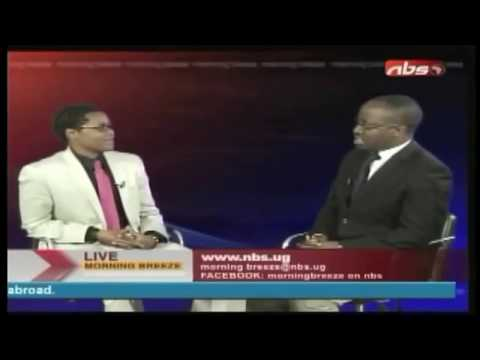

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [6]:
ydl_opts = {
    'format': 'bestaudio/best',
    'postprocessors': [{
        'key': 'FFmpegExtractAudio',
        'preferredcodec': 'wav',  # FFmpeg  is used to make wav file
        'preferredquality': '192',  # Bitrate setup for better audio qualit
    }],
    'outtmpl': 'audio.%(ext)s',  # Saving the audio as audio.wav
}

In [7]:
with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    ydl.download([VIDEO_URL])


[youtube] Extracting URL: https://www.youtube.com/watch?v=ooOELrGMn14
[youtube] ooOELrGMn14: Downloading webpage
[youtube] ooOELrGMn14: Downloading ios player API JSON
[youtube] ooOELrGMn14: Downloading web creator player API JSON
[youtube] ooOELrGMn14: Downloading m3u8 information
[info] ooOELrGMn14: Downloading 1 format(s): 251
[download] Destination: audio.webm
[download] 100% of  905.23KiB in 00:00:00 at 2.26MiB/s   
[ExtractAudio] Destination: audio.wav
Deleting original file audio.webm (pass -k to keep)


In [8]:
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-large-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-large-960h")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/

In [9]:
audio_file = 'audio.wav'  # This should be the filename of the downloaded audio
waveform, sample_rate = torchaudio.load(audio_file)

In [10]:
if sample_rate != 16000: #pretrained wav2vec2 models req.frequency so resampled
    resampler = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)
    waveform = resampler(waveform)

In [11]:
waveform = waveform.squeeze().numpy() #purther processing of waveform tensor ,reduces tensor of size 1 for 1d inputarray to be used by wav2vec2
#numpy was used to change pytorch tensor to numpy array


In [12]:
inputs = processor(waveform, sampling_rate=16000, return_tensors="pt", padding=True)

In [13]:
with torch.no_grad(): #no gradient computation cuss i am not training this model amd memory precious TT
    logits = model(inputs.input_values).logits #raw prediction output

In [14]:
predicted_ids = torch.argmax(logits, dim=-1)#oper.done till last dim and tensor of predicted tocken id is given
transcription = processor.batch_decode(predicted_ids) #decoding back to legible language

In [15]:
print("Transcription:")
print(transcription[0])

Transcription:
WE BRING IN A STUDIO THIS MORNING ONE OF THE GAY RATES ACTIVES MISTER SHOULD I CALL YOU MISTER YE PAY JULIAN ONZEMA THANK YOU FOR COMING IN THINK GOOD MORNING MONINWHY ARE YOU GAY WHO SAYS IAM GA YOU ARE GAY YOU AE TRANSLAYIN MI A MY WET SUS THAT IAM YOU AE TRANSGENDA AND YOU GAYRATE ACTIVEIS AND AN OUTSPOKEN AM A A LISBIAN HOMOS SET SHUR HOW COULD I DESCRIBE YOU NOW WE'RE LOOKING AT THE RAGING DEBATE A YOUR GAYRATES ACTIVES WHY SHOULD SOME ONE BE GAY YOU HAVE ING A GODFRIEND YES D YOU PERFORM THE NATURAL OBLIGATIONS A IAM NOT SEXUALLY ACTIVE RITE NOW SO WHAT A LI JOGEOUS LADY LA JHOISE MA CHOISE AV JUST NOT HAVE HAVE CHOSEN NOT TO ENGAGE DOES IN THAT MAKE YOU GAY WHY DO YOU MEAN THAS IN THAT MAKE ME GA I AM I AM MALE AND ATTRACTED TO A FEMALE SO WHO IS GAY AGAY


In [16]:
!pip install jiwer
import jiwer

In [17]:
ground_truth = "WE BRING IN THE STUDIO THIS MORNING ONE OF THE GAY RATES ACTISTS MISTER SHOULD I CALL YOU MISTER YE PE JULIAN ONZEIMA THANK YOU FOR COMING IN THINK GOOD MORNING MONING WHY ARE YOU GAY WHO SAYS IAM GAY YOU ARE GAY YOU ARE  A TRANSGENDER AS I SAID I AM YOU ARE TRANSGENDER AND YOU ARE GAY RIGHT ACTIVIST AND AN OUTSPOKEN AND A A LESBIAN HOMOS SET SHUR HOW COULD I DESCRIBE YOU NOW WE'RE LOOKING AT THE RAGING DEBATE A YOUR GAYRATES ACTIVES WHY SHOULD SOME ONE BE GAY YOU HAVE ING A GODFRIEND YES D YOU PERFORM THE NATURAL OBLIGATIONS A IAM NOT SEXUALLY ACTIVE RITE NOW SO WHAT A LI JOGEOUS LADY LA MY CHOICE AND JUST NOT HAVE HAVE CHOSEN NOT TO ENGAGE DOES IN THAT MAKE YOU GAY WHY DO YOU MEAN THAS IN THAT MAKE ME GAY I AM I AM MALE AND ATTRACTED TO A FEMALE SO WHO IS GAY A GAY"

In [18]:
predicted_transcription = "WE BRING IN A STUDIO THIS MORNING ONE OF THE GAY RATES ACTIVES MISTER SHOULD I CALL YOU MISTER YE PAY JULIAN ONZEMA THANK YOU FOR COMING IN THINK GOOD MORNING MONINWHY ARE YOU GAY WHO SAYS IAM GA YOU ARE GAY YOU AE TRANSLAYIN MI A MY WET SUS THAT IAM YOU AE TRANSGENDA AND YOU GAYRATE ACTIVEIS AND AN OUTSPOKEN AM A A LISBIAN HOMOS SET SHUR HOW COULD I DESCRIBE YOU NOW WE'RE LOOKING AT THE RAGING DEBATE A YOUR GAYRATES ACTIVES WHY SHOULD SOME ONE BE GAY YOU HAVE ING A GODFRIEND YES D YOU PERFORM THE NATURAL OBLIGATIONS A IAM NOT SEXUALLY ACTIVE RITE NOW SO WHAT A LI JOGEOUS LADY LA JHOISE MA CHOISE AV JUST NOT HAVE HAVE CHOSEN NOT TO ENGAGE DOES IN THAT MAKE YOU GAY WHY DO YOU MEAN THAS IN THAT MAKE ME GA I AM I AM MALE AND ATTRACTED TO A FEMALE SO WHO IS GAY AGAY"

In [19]:
wer = jiwer.wer(ground_truth, predicted_transcription)

In [20]:
import numpy as np

def wer(reference, hypothesis): #ref ground truth ,hypo prediction
    # Split the sentences into words
    r = reference.split()
    h = hypothesis.split()
#honestly no idea how wer worked so used gpt, got to know matrix is made to find how much cost it takes to change ref to hypo
    d = np.zeros((len(r) + 1, len(h) + 1), dtype=np.uint32)
    for i in range(len(r) + 1):
        d[i][0] = i #shows cost of transforming ref to empty hypo
    for j in range(len(h) + 1):
        d[0][j] = j #shows cost of transforming from empty ref to hypo
    for i in range(1, len(r) + 1):
        for j in range(1, len(h) + 1):
            if r[i - 1] == h[j - 1]: #no operation tobe done for a match
                d[i][j] = d[i - 1][j - 1]
            else:
                substitution = d[i - 1][j - 1] + 1
                insertion = d[i][j - 1] + 1
                deletion = d[i - 1][j] + 1
                d[i][j] = min(substitution, insertion, deletion)




In [21]:
wer_value = jiwer.wer(ground_truth, predicted_transcription)  # Ensure to call the function

# Print the WER
print(f"WER: {wer_value:.4f}")  #value is between 0 and 1 ,1 being all incorrrect
accuracy = (1-wer_value) * 100
print(f"accuracy: {accuracy:.2f}%")

WER: 0.1914
accuracy: 80.86%
